## Метод неопределенных коэффициентов
Необходимо найти полином вида
$$
f(x) = a_0 +  a_1x^1 + \dots + a_{n-1}x^{n-1} + a_nx^n 
$$
который проходит через заданное множество точек $(x_0,y_0)$, $(x_1,y_1)$, ...,$(x_n,y_n)$. Если степень полинома $n$, то точек $n+1$, такое же, как и количество коэффициентов в полиноме $a_0$, ..., $a_n$.

По заданным точкам  $(x_0,y_0)$, ...,$(x_n,y_n)$ нам необходимо определить $a_0$, ..., $a_n$.
Подставим каждую из точке в полином и получим систему линейных уравнений относительно неизвестных $a_0$, ..., $a_n$.
$$
\left\{
\begin{matrix}
a_0 +  a_1x_0^1 + \dots + a_{n-1}x_0^{n-1} + a_nx_0^n = y_0 \\
a_0 +  a_1x_1^1 + \dots + a_{n-1}x_1^{n-1} + a_nx_1^n  = y_1 \\
\vdots \\
a_0 +  a_1x_n^1 + \dots + a_{n-1}x_n^{n-1} + a_nx_n^n  = y_n \\
\end{matrix}
\right.
$$

Обращаем Ваше внимание, что в данной системе $x_i^j$ и $y_i$- конкретные известные нам числа, а неизвестными являются $a_i$.
В матричном виде данная система выглядит следующим образом:

$$
\begin{pmatrix}
1 & x_0^1 & \dots &  x_0^{n-1} &  x_0^n \\
1 & x_1^1 & \dots &  x_1^{n-1} &  x_1^n \\
\vdots \\
1 & x_n^1 & \dots &  x_n^{n-1} &  x_n^n \\
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_{n} \\
\end{pmatrix}
=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_{n} \\
\end{pmatrix}
$$

## Пример для $n=2$


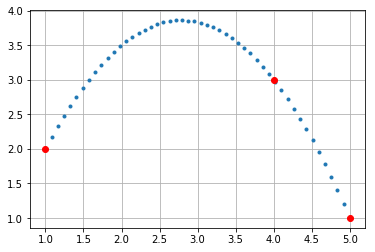

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,4,5])
Y = np.array([2,3,1])
R = np.array([
    [1,  X[0], X[0]**2],
    [1,  X[1], X[1]**2],
    [1,  X[2], X[2]**2],
    
])
A = np.linalg.solve(R,Y)

linsp  = np.linspace(X.min(), X.max())  # Множество значений от X.min() до X.max() (с шагом 50 по умолчанию)
fun = A[0] + (A[1] + A[2]*linsp)*linsp # Расчет значений во всех точках linsp (по схеме Горнера) 
plt.plot(linsp,fun,'.');
plt.plot(X,Y, 'ro');
plt.grid(True)

## Задание 1
Реализуйте данную задачу для $n=4$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5])
Y = np.array([2,3,1,-1,2])
# ¯\_(ツ)_/¯

## Некоторые функции numpy для упрощения работы

In [3]:
A = np.power(2, range(7))
print('A =',A)
B = np.power(3, range(7))
print('-'*30)
print('B = ',B)
C = np.vstack([A,B])
print('-'*30)
print('Вертикальная склейка матриц A и В') 
print(C)

A = [ 1  2  4  8 16 32 64]
------------------------------
B =  [  1   3   9  27  81 243 729]
------------------------------
Вертикальная склейка матриц A и В
[[  1   2   4   8  16  32  64]
 [  1   3   9  27  81 243 729]]


## Задание 2
Пользуясь приведенными выше функциями реализуйте задачу для проивольного $n$

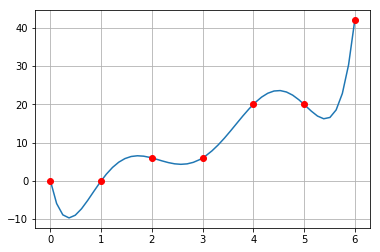

In [4]:
n = 7
X = np.array(range(n))
Y = np.zeros(n)
for i in range(n):
    Y[i] = i*(-1)**i + i**2

A = np.power(X[0], range(n))
for i in range(1,n):
    A = np.vstack([A,np.power(X[i], range(n))])
R = np.linalg.solve(A,Y)

linsp  = np.linspace(X.min(), X.max())
fun = R[n-1]
for i in range(n-2,-1,-1):
    fun = fun*linsp + R[i]
plt.plot(linsp,fun);
plt.plot(X,Y, 'ro');
plt.grid(True)
# ¯\_(ツ)_/¯

## Метод наименьших квадратов

http://setosa.io/ev/ordinary-least-squares-regression/

Рассмотрим четыре точки $(0, -1)$, $(0,1)$, $(3,2)$ и $(3,4)$. Очевидно, что эти точки не лежат на одной прямой, тем не менее попытаемся найти прямую вида $y = kx + l$, которая проходила бы через все эти точки.

Запишем сисему:
$$
\left\{
\begin{matrix}
k \cdot 0 + l = -1 \\
k \cdot 0 + l = 1 \\
k \cdot 3 + l = 2 \\
k \cdot 3 + l = 4 \\
\end{matrix}
\right.
$$

Или в матричном виде:
$$
\begin{pmatrix}
0 & 1 \\
0 & 1 \\
3 & 1 \\
3 & 1 \\
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
-1 \\
1 \\
2 \\
4 \\
\end{pmatrix}
$$

Или в общем виде:
$$
AX=B
$$

Оказывается, что "решение" данной системы методом наименьших квадратов может быть найдено, если данное равенство умножить слева на $A^t$, т.е.
$$
A^tAX=A^tB
$$

В нашем случае мы получаем:
$$
\begin{pmatrix}
0 & 0 & 3 & 3 \\
1 & 1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
0 & 1 \\
0 & 1 \\
3 & 1 \\
3 & 1 \\
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 & 3 & 3 \\
1 & 1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
-1 \\
1 \\
2 \\
4 \\
\end{pmatrix}
$$

Умножаем матрицы:

$$
\begin{pmatrix}
18 & 6\\
6 & 4 
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
18 \\
6 \\
\end{pmatrix}
$$

Откуда получаем решение $k = 1$, $l=0$ системы и искомую прямую
$$
y = 1 \cdot x + 0.
$$

Решение через lstsq дает: [1.00000000e+00 4.28158246e-16]
Решение через умножение на A.T дает: [1. 0.]


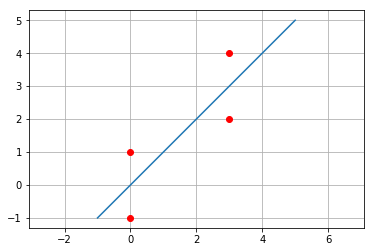

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0, 3, 3])
y = np.array([-1, 1, 4, 2])
A = np.vstack([x, np.ones(len(x))]).T
R = np.linalg.lstsq(A,y,rcond=None)[0]
print('Решение через lstsq дает:', R)

P = A.T.dot(A)
q = A.T.dot(y)
L = np.linalg.inv(P).dot(q)
print('Решение через умножение на A.T дает:', L)

plt.plot(x,y,'ro');

lin = np.linspace(-1, 5)
plt.plot(lin,R[0]*lin+R[1]);
plt.axis([-1,5,-5,5]);
plt.axis('equal');
plt.grid(True)


### Задание 3

При помощи метода наименьших квадратов найти функцию вида 
$$
y = ax^2 + bx + c,
$$
которая ниболее близко располагается между пяти заданных точек.

In [6]:
x = np.array([0, 0, 3, 3, 5])
y = np.array([-1, 1, 4, 2, 2])
# ¯\_(ツ)_/¯

## Задание 4
Реализуйте метод наименьших квадратов для произвольного многочлена степени $d$ и произвольного множества точке, мощности $n$

In [7]:
n = 7
X = np.array(range(n))
Y = np.zeros(n)
for i in range(n):
    Y[i] = i*(-1)**i + i**2
# ¯\_(ツ)_/¯
